In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import difflib
## Stats on Output and Citation

# Load and clean the output file
aujour_or = pd.read_csv("2010AJR.csv")

aujour_or = aujour_or.drop(aujour_or.columns[[0]], axis=1)
aujour_or = aujour_or.drop(aujour_or.columns[[range(2,8)]], axis=1)


aujour_or = aujour_or.rename(columns = {"Title":"VolumeTitle"})
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('X', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('X', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('X', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('X', '')
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('-', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('-', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('-', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('-', '')
aujour_or

,Rank,VolumeTitle,ISSN1,ISSN2,ISSN3,ISSN4
0,C,1913: a journal of forms,15489914,NaN,NaN,NaN
1,B,3CMedia,18326161,1445971,NaN,NaN
2,C,4OR: A Quarterly Journal of Operations Research,16194500,03908127,NaN,NaN
3,C,A St A: Advances in Statistical Analysis,18638171,1863818,00026018,NaN
4,A,AA files: annals of the Architectural Associat...,02616823,NaN,NaN,NaN
5,B,AACE International Transactions,15287106,NaN,NaN,NaN
6,B,AACE Journal,15513696,NaN,NaN,NaN
7,C,AACN Advanced Critical Care,15597768,15597776,10790713,NaN
8,C,AANA Journal,00946354,NaN,NaN,NaN
9,C,AAOHN Journal,08910162,NaN,NaN,NaN


In [28]:
refcs_or = pd.read_csv("REF2014Data_output.csv")

refcs_or = refcs_or.drop(refcs_or.columns[[range(1,8)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[[range(2,7)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[3::], axis=1)
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('X', '')
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('-', '')

refcs_or

,UKPRN,VolumeTitle,ISSN
0,10007850,Optics Letters,01469592
1,10007850,Optics Express,10944087
2,10007850,Physical Review Letters,00319007
3,10007850,Physical Review Letters,00319007
4,10007850,Physical Review Letters,00319007
5,10007850,Physical Review Letters,00319007
6,10007850,Nature Photonics,17494885
7,10007850,Optics Express,10944087
8,10007850,Optics Express,10944087
9,10007850,Optics Express,10944087


In [29]:
ref = {}
for index, row in refcs_or.iterrows():
    indexs = index
    ref[index] = row["ISSN"]

In [30]:
ajourone = {}
for index, row in aujour_or.iterrows():
    ajourone[row["ISSN1"]] = row["Rank"]

len(ajourone)

20712

In [31]:
ajourtwo = {}
for index, row in aujour_or.iterrows():
    ajourtwo[row["ISSN2"]] = row["Rank"]

len(ajourtwo)

11416

In [32]:
ajourthree = {}
for index, row in aujour_or.iterrows():
    ajourthree[row["ISSN3"]] = row["Rank"]

len(ajourthree)

1511

In [33]:
ajourfour = {}
for index, row in aujour_or.iterrows():
    ajourfour[row["ISSN4"]] = row["Rank"]

len(ajourfour)

212

In [34]:
ranklistone = {}

for index in ref:
    for issn in ajourone:
        if issn == ref[index]:
            ranklistone[index] = ajourone[issn]

In [35]:
ranklisttwo = {}

for index in ref:
    for issn in ajourtwo:
        if issn == ref[index]:
            ranklisttwo[index] = ajourtwo[issn]

In [36]:
ranklistthree = {}

for index in ref:
    for issn in ajourthree:
        if issn == ref[index]:
            ranklistthree[index] = ajourthree[issn]

In [37]:
ranklistfour= {}

for index in ref:
    for issn in ajourfour:
        if issn == ref[index]:
            ranklistfour[index] = ajourfour[issn]
            
ranklistfour

{520: 'A*',
 543: 'A*',
 544: 'A*',
 617: 'A*',
 629: 'A*',
 631: 'A*',
 635: 'A*',
 650: 'A*',
 764: 'A*',
 808: 'A*',
 834: 'A*',
 842: 'A*',
 846: 'A*',
 931: 'A*',
 936: 'A*',
 956: 'A*',
 1375: 'A*',
 1457: 'A*',
 1675: 'A*',
 1804: 'A*',
 1822: 'A*',
 2057: 'A*',
 2131: 'A*',
 2145: 'A*',
 2159: 'A*',
 2824: 'A*',
 2834: 'A*',
 2842: 'A*',
 2884: 'A*',
 2906: 'A*',
 2909: 'A*',
 2915: 'A*',
 3092: 'A*',
 3231: 'A*',
 3439: 'A*',
 3462: 'A*',
 3503: 'A*',
 3510: 'A*',
 3566: 'A*',
 3618: 'A*',
 3637: 'A*',
 4017: 'A*',
 4044: 'A*',
 4185: 'A*',
 4243: 'A*',
 4410: 'A*',
 4467: 'A*',
 4643: 'A*',
 4679: 'A*',
 4838: 'A*',
 4839: 'A*',
 4908: 'A*',
 4914: 'A*',
 5043: 'A*',
 5044: 'A*',
 5049: 'A*'}

In [39]:
ref_rankd = refcs_or
ref_rankd["Rank1"] = pd.Series(ranklistone)
ref_rankd["Rank2"] = pd.Series(ranklisttwo)
ref_rankd["Rank3"] = pd.Series(ranklistthree)
ref_rankd["Rank4"] = pd.Series(ranklistfour)

ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank2']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank3']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank4']

ref_rankd = ref_rankd.drop(["Rank2", "Rank3", "Rank4"], axis = 1)

count_nan = len(ref_rankd) - ref_rankd.count()

ref_rankd

,UKPRN,VolumeTitle,ISSN,Rank1
0,10007850,Optics Letters,01469592,A*
1,10007850,Optics Express,10944087,A*
2,10007850,Physical Review Letters,00319007,A*
3,10007850,Physical Review Letters,00319007,A*
4,10007850,Physical Review Letters,00319007,A*
5,10007850,Physical Review Letters,00319007,A*
6,10007850,Nature Photonics,17494885,A*
7,10007850,Optics Express,10944087,A*
8,10007850,Optics Express,10944087,A*
9,10007850,Optics Express,10944087,A*


In [40]:
totastar ={}
tota = {}
totb = {}
totc = {}
totjur = {}

totastara = {}

for index,row in ref_rankd.iterrows():
    if row["Rank1"] == "A*":
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 1
        else:
            totastar[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 0
    
    if row["Rank1"] == "A":
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 1
        else:
            tota[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 0
            
    if row["Rank1"] == "B":
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 1
        else:
            totb[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 0
            
    if row["Rank1"] == "C":
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 1
        else:
            totc[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 0
        
    if row["UKPRN"] not in totjur:
        totjur[row["UKPRN"]] = 1
    else:
        totjur[row["UKPRN"]] += 1
        
    if row["Rank1"] == "A*" or row["Rank1"] == "A":
        if row["UKPRN"] not in totastara:
            totastara[row["UKPRN"]] = 1
        else:
            totastara[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totastara:
            totastara[row["UKPRN"]] = 0

In [48]:
## Now to add the four star rating
fourstr = pd.read_csv("REF2014Data_submissionprofile.csv")



fourstr = fourstr[fourstr["Profile"].str.contains("Outputs")]


fourstrdic = {}
threestrdic = {}
twostrdic = {}
onestrdic = {}

for index, row in fourstr.iterrows():
    fourstrdic[row["UKPRN"]] = row["FourStar"]
    threestrdic[row["UKPRN"]] = row["ThreeStar"]
    twostrdic[row["UKPRN"]] = row["TwoStar"]
    onestrdic[row["UKPRN"]] = row["OneStar"]


In [49]:
avastara = {}

for universityaa in totastara:
    for universitiesaa in totjur:
        if universitiesaa == universityaa:
            avastara[universitiesaa] = totastara[universityaa]/totjur[universitiesaa]*100

In [50]:
avastar = {}

for university in totastar:
    for universities in totjur:
        if universities == university:
            avastar[universities] = totastar[university]/totjur[universities]*100

In [51]:
ava = {}

for universitya in tota:
    for universitiesa in totjur:
        if universitiesa == universitya:
            ava[universitiesa] = tota[universitya]/totjur[universitiesa]*100

In [52]:
avb = {}

for universityb in totb:
    for universitiesb in totjur:
        if universitiesb == universityb:
            avb[universitiesb] = totb[universityb]/totjur[universitiesb]*100

In [53]:
avc = {}

for universityc in totc:
    for universitiesc in totjur:
        if universitiesc == universityc:
            avc[universitiesc] = totc[universityc]/totjur[universitiesc]*100

In [54]:
rankfoura = {}

for uniaa in fourstrdic:
    for unisaa in avastara:
        if unisaa == uniaa:
            rankfoura[avastara[unisaa]] = fourstrdic[uniaa]

In [55]:
rankfour = {}

for uni in fourstrdic:
    for unis in avastar:
        if unis == uni:
            rankfour[avastar[unis]] = fourstrdic[uni]

In [56]:
rankthree = {}

for unia in threestrdic:
    for unisa in ava:
        if unisa == unia:
            rankthree[ava[unisa]] = threestrdic[unia]

In [57]:
ranktwo = {}

for unib in twostrdic:
    for unisb in avb:
        if unisb == unib:
            ranktwo[avb[unisb]] = twostrdic[unib]

In [58]:
rankone = {}

for unic in onestrdic:
    for unisc in avc:
        if unisc == unic:
            rankone[avc[unisc]] = onestrdic[unic]

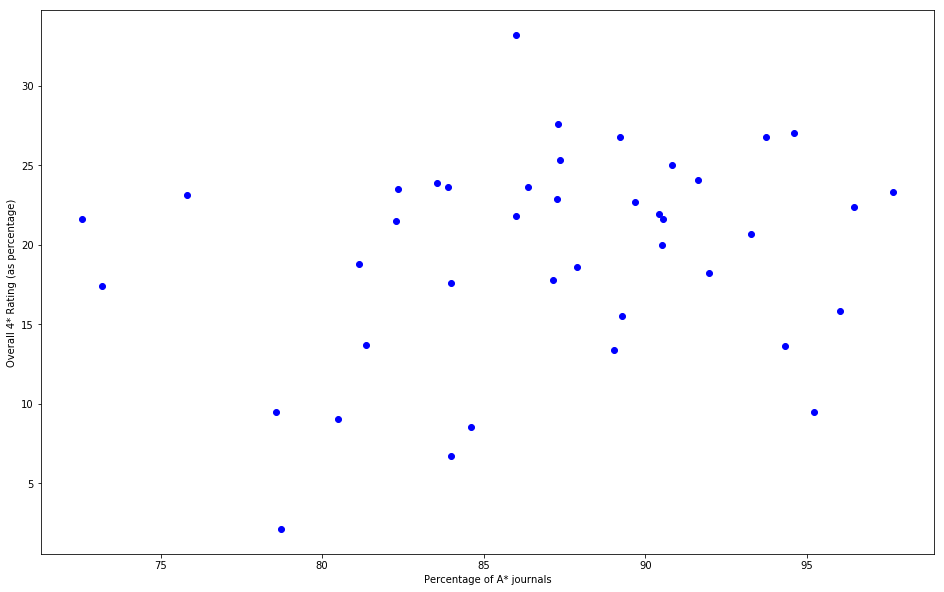

In [60]:
import matplotlib.pylab as plt
%matplotlib inline

listsfa = sorted(rankfoura.items())
listsf = sorted(rankfour.items()) # sorted by key, return a list of tuples
listst = sorted(rankthree.items()) # sorted by key, return a list of tuples
liststw = sorted(ranktwo.items()) # sorted by key, return a list of tuples
listso = sorted(rankone.items()) # sorted by key, return a list of tuples

xastara,yastara = zip(*listsfa)
xastar, yastar = zip(*listsf) # unpack a list of pairs into two tuples
xa, ya = zip(*listst) # unpack a list of pairs into two tuples
xb, yb = zip(*liststw) # unpack a list of pairs into two tuples
xc, yc = zip(*listso) # unpack a list of pairs into two tuples


#plt.subplots(2,2, figsize = [16,10])
plt.figure(figsize = [16,10])
plt.plot(xastara,yastara, "bo")
plt.xlabel("Percentage of A* journals")#
plt.ylabel("Overall 4* Rating (as percentage)")
#plt.savefig("C vs 1star")

#plt.plot(xb,yb, "bo")
#plt.xlabel("Percentage of B journals")
#plt.ylabel("Overall 2* Rating (as percentage)")

#plt.subplots(2,2, figsize = [16,10])
#plt.plot(xa,ya, "bo")
#plt.xlabel("Percentage of A journals")
#plt.ylabel("Overall 3* Rating (as percentage)")
#plt.savefig("A vs 3star")

#plt.subplots(2,2, figsize = [16,10])
#plt.plot(xastar,yastar, "bo")
#plt.xlabel("Percentage of A* journals")#
#plt.ylabel("Overall 4* Rating (as percentage)")
#plt.savefig("Astar vs 4star")


In [61]:
from scipy.stats.stats import pearsonr

pearsonr(xastara,yastara)

(0.22996845457422685, 0.14805201696708825)